In [1]:
#Importing required packages.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import datetime
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
#  Import and read the HR_Analytics.csv.
application_df = pd.read_csv("./DataFiles/HR_Analytics.csv")
final_results_all = []
application_df.head()

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,RM297,18,18-25,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,...,3,80,0,0,2,3,0,0,0,0.0
1,RM302,18,18-25,No,Travel_Rarely,812,Sales,10,3,Medical,...,1,80,0,0,2,3,0,0,0,0.0
2,RM458,18,18-25,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,...,4,80,0,0,3,3,0,0,0,0.0
3,RM728,18,18-25,No,Non-Travel,287,Research & Development,5,2,Life Sciences,...,4,80,0,0,2,3,0,0,0,0.0
4,RM829,18,18-25,Yes,Non-Travel,247,Research & Development,8,1,Medical,...,4,80,0,0,0,3,0,0,0,0.0


# Preprocessing: Remove Non-Beneficial Columns

In [3]:
# Create a dictionary with column names and their unique value counts
unique_counts = {col:application_df[col].nunique() for col in application_df.columns}

# Convert the dictionary to a DataFrame
unique_counts_df = pd.DataFrame(list(unique_counts.items()), columns=['Column Name', 'Unique Values'])

# Display the new DataFrame
print(unique_counts_df)

                 Column Name  Unique Values
0                      EmpID           1470
1                        Age             43
2                   AgeGroup              5
3                  Attrition              2
4             BusinessTravel              4
5                  DailyRate            886
6                 Department              3
7           DistanceFromHome             29
8                  Education              5
9             EducationField              6
10             EmployeeCount              1
11            EmployeeNumber           1470
12   EnvironmentSatisfaction              4
13                    Gender              2
14                HourlyRate             71
15            JobInvolvement              4
16                  JobLevel              5
17                   JobRole              9
18           JobSatisfaction              4
19             MaritalStatus              3
20             MonthlyIncome           1349
21                SalarySlab    

In [4]:
#make a copy of dataframe
a1pplication_df = application_df.copy()

print(a1pplication_df.shape)

(1480, 38)


In [5]:
# Identify columns with only one unique value
cols_to_drop = [col for col in a1pplication_df.columns if a1pplication_df[col].nunique() == 1]

# Drop these columns from the DataFrame
a1pplication_df.drop(cols_to_drop, axis=1, inplace=True)
a1pplication_df.shape

(1480, 35)

# Preprocessing: Removing Duplicate Rows

In [6]:
print(f'dataframe shape before duplicate removal: {application_df.shape}')
duplicates_removed_df = a1pplication_df.drop_duplicates()
print(f'dataframe shape after duplicate removal: {duplicates_removed_df.shape}')

dataframe shape before duplicate removal: (1480, 38)
dataframe shape after duplicate removal: (1473, 35)


# Preprocessing: Removing Duplicate EmpID Rows

In [7]:
print(f'dataframe shape after duplicate removal: {duplicates_removed_df.shape}')

# Create a dictionary with column names and their unique value counts
unique_counts = {col:duplicates_removed_df[col].nunique() for col in duplicates_removed_df.columns}

# Convert the dictionary to a DataFrame
unique_counts_df = pd.DataFrame(list(unique_counts.items()), columns=['Column Name', 'Unique Values'])

# Display the new DataFrame
print(unique_counts_df)

dataframe shape after duplicate removal: (1473, 35)
                 Column Name  Unique Values
0                      EmpID           1470
1                        Age             43
2                   AgeGroup              5
3                  Attrition              2
4             BusinessTravel              4
5                  DailyRate            886
6                 Department              3
7           DistanceFromHome             29
8                  Education              5
9             EducationField              6
10            EmployeeNumber           1470
11   EnvironmentSatisfaction              4
12                    Gender              2
13                HourlyRate             71
14            JobInvolvement              4
15                  JobLevel              5
16                   JobRole              9
17           JobSatisfaction              4
18             MaritalStatus              3
19             MonthlyIncome           1349
20                Salary

In [8]:
duplicates_removed_df.loc[duplicates_removed_df['EmpID'] == 'RM1465']

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
161,RM1465,26,26-35,No,Travel_Rarely,1167,Sales,5,3,Other,...,3,4,0,5,2,3,4,2,0,0.0
162,RM1465,26,26-35,No,Travel_Rarely,1167,Sales,5,3,Other,...,3,4,0,5,2,3,4,2,0,5.0


In [9]:
duplicates_removed_df.loc[duplicates_removed_df['EmpID'] == 'RM1466']

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
802,RM1466,36,36-45,No,Travel_Frequently,884,Research & Development,23,2,Medical,...,3,3,1,17,3,3,5,2,0,3.0
803,RM1466,36,36-45,No,Travel_Frequently,884,Research & Development,23,2,Medical,...,3,3,1,17,3,3,5,2,0,2.0


In [10]:
duplicates_removed_df.loc[duplicates_removed_df['EmpID'] == 'RM1467']

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
953,RM1467,39,36-45,No,Travel_Rarely,613,Research & Development,6,1,Medical,...,3,1,1,9,5,3,7,7,1,7.0
955,RM1467,39,36-45,No,Travel_Rarely,613,Research & Development,6,1,Medical,...,3,1,1,9,5,3,7,7,1,1.0


In [11]:
print(f'Shape of dataframe before removing duplicate EmpID rows: {duplicates_removed_df.shape}')

duplicates_EmpID_removed_df = duplicates_removed_df.loc[~duplicates_removed_df.index.isin([161, 803, 955])]

print(f'Shape of dataframe after removing duplicate EmpID rows: {duplicates_EmpID_removed_df.shape}')

Shape of dataframe before removing duplicate EmpID rows: (1473, 35)
Shape of dataframe after removing duplicate EmpID rows: (1470, 35)


# Preprocessing: Convert 2 valued columns to '1's and '0's

In [12]:
#Check to see if only 2 choices for 'Attrition' column
attrition1And0_df = duplicates_EmpID_removed_df.copy()
attrition1And0_df['Attrition'].unique()

array(['Yes', 'No'], dtype=object)

In [13]:
#Make another copy of df
a2pplication_df = attrition1And0_df.copy()
print(a2pplication_df.shape)
print(a2pplication_df.info())
a2pplication_df.head()

(1470, 35)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 0 to 1479
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmpID                     1470 non-null   object 
 1   Age                       1470 non-null   int64  
 2   AgeGroup                  1470 non-null   object 
 3   Attrition                 1470 non-null   object 
 4   BusinessTravel            1470 non-null   object 
 5   DailyRate                 1470 non-null   int64  
 6   Department                1470 non-null   object 
 7   DistanceFromHome          1470 non-null   int64  
 8   Education                 1470 non-null   int64  
 9   EducationField            1470 non-null   object 
 10  EmployeeNumber            1470 non-null   int64  
 11  EnvironmentSatisfaction   1470 non-null   int64  
 12  Gender                    1470 non-null   object 
 13  HourlyRate                1470 non-null   int64  
 1

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,RM297,18,18-25,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,...,3,3,0,0,2,3,0,0,0,0.0
1,RM302,18,18-25,No,Travel_Rarely,812,Sales,10,3,Medical,...,3,1,0,0,2,3,0,0,0,0.0
2,RM458,18,18-25,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,...,3,4,0,0,3,3,0,0,0,0.0
3,RM728,18,18-25,No,Non-Travel,287,Research & Development,5,2,Life Sciences,...,3,4,0,0,2,3,0,0,0,0.0
4,RM829,18,18-25,Yes,Non-Travel,247,Research & Development,8,1,Medical,...,3,4,0,0,0,3,0,0,0,0.0


In [14]:
#Set 'Attrition' column to binary
a2pplication_df['Attrition'] = a2pplication_df['Attrition'].replace('No',"0")
a2pplication_df['Attrition'] = a2pplication_df['Attrition'].replace('Yes',"1")
a2pplication_df['Attrition'] = a2pplication_df['Attrition'].astype('int64')
print(a2pplication_df.shape)
print(a2pplication_df.info())
a2pplication_df.head()

(1470, 35)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 0 to 1479
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmpID                     1470 non-null   object 
 1   Age                       1470 non-null   int64  
 2   AgeGroup                  1470 non-null   object 
 3   Attrition                 1470 non-null   int64  
 4   BusinessTravel            1470 non-null   object 
 5   DailyRate                 1470 non-null   int64  
 6   Department                1470 non-null   object 
 7   DistanceFromHome          1470 non-null   int64  
 8   Education                 1470 non-null   int64  
 9   EducationField            1470 non-null   object 
 10  EmployeeNumber            1470 non-null   int64  
 11  EnvironmentSatisfaction   1470 non-null   int64  
 12  Gender                    1470 non-null   object 
 13  HourlyRate                1470 non-null   int64  
 1

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,RM297,18,18-25,1,Travel_Rarely,230,Research & Development,3,3,Life Sciences,...,3,3,0,0,2,3,0,0,0,0.0
1,RM302,18,18-25,0,Travel_Rarely,812,Sales,10,3,Medical,...,3,1,0,0,2,3,0,0,0,0.0
2,RM458,18,18-25,1,Travel_Frequently,1306,Sales,5,3,Marketing,...,3,4,0,0,3,3,0,0,0,0.0
3,RM728,18,18-25,0,Non-Travel,287,Research & Development,5,2,Life Sciences,...,3,4,0,0,2,3,0,0,0,0.0
4,RM829,18,18-25,1,Non-Travel,247,Research & Development,8,1,Medical,...,3,4,0,0,0,3,0,0,0,0.0


In [15]:
#Convert Categorical data to numeric with 'pd.get_dummies'
dummies = pd.get_dummies(a2pplication_df)
print(dummies.shape)
dummies.head()

(1470, 1533)


,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,SalarySlab_10k-15k,SalarySlab_15k+,SalarySlab_5k-10k,SalarySlab_Upto 5k,OverTime_No,OverTime_Yes
0,18,1,230,3,3,405,3,54,3,1,...,0,0,0,1,0,0,0,1,1,0
1,18,0,812,10,3,411,4,69,2,1,...,1,0,0,1,0,0,0,1,1,0
2,18,1,1306,5,3,614,2,69,3,1,...,1,0,0,1,0,0,0,1,0,1
3,18,0,287,5,2,1012,2,73,3,1,...,0,0,0,1,0,0,0,1,1,0
4,18,1,247,8,1,1156,3,80,3,1,...,0,0,0,1,0,0,0,1,1,0


In [16]:
#Replace all NaaN values with 0
dummies.fillna(0, inplace=True)
print(dummies.shape)
dummies.head()

(1470, 1533)


,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,SalarySlab_10k-15k,SalarySlab_15k+,SalarySlab_5k-10k,SalarySlab_Upto 5k,OverTime_No,OverTime_Yes
0,18,1,230,3,3,405,3,54,3,1,...,0,0,0,1,0,0,0,1,1,0
1,18,0,812,10,3,411,4,69,2,1,...,1,0,0,1,0,0,0,1,1,0
2,18,1,1306,5,3,614,2,69,3,1,...,1,0,0,1,0,0,0,1,0,1
3,18,0,287,5,2,1012,2,73,3,1,...,0,0,0,1,0,0,0,1,1,0
4,18,1,247,8,1,1156,3,80,3,1,...,0,0,0,1,0,0,0,1,1,0


In [17]:
#Separate Data into X and y
X = dummies.drop('Attrition', axis=1)
y = dummies['Attrition']

In [18]:
#Train and Test splitting of data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [19]:
#Applying Standard scaling to get optimized result
scaler = StandardScaler()

In [20]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Random Forest Classifier Model

In [21]:
#Use Random Forest Classifier Model
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train_scaled, y_train)
prediction_rfc = rfc.predict(X_test_scaled)

In [22]:
#Classification Report
print(classification_report(y_test, prediction_rfc))

              precision    recall  f1-score   support

           0       0.83      1.00      0.90       241
           1       1.00      0.04      0.07        53

    accuracy                           0.83       294
   macro avg       0.91      0.52      0.49       294
weighted avg       0.86      0.83      0.75       294



In [23]:
#Confusion Matirix
print(confusion_matrix(y_test, prediction_rfc))

[[241   0]
 [ 51   2]]


In [24]:
#list which features with importance
importances = rfc.feature_importances_
importances_sorted = sorted(zip(rfc.feature_importances_, X.columns), reverse=True)
importances_sorted[:10]

[(0.043358180940346935, 'MonthlyIncome'),
 (0.03428943653795734, 'Age'),
 (0.03341077451930081, 'EmployeeNumber'),
 (0.0315356692504124, 'YearsAtCompany'),
 (0.03147071822202165, 'DailyRate'),
 (0.030547789328300858, 'MonthlyRate'),
 (0.030223359041552995, 'DistanceFromHome'),
 (0.0299014966812261, 'TotalWorkingYears'),
 (0.02862686764744855, 'HourlyRate'),
 (0.023511172442211552, 'OverTime_No')]

<Axes: title={'center': 'Feature Importances'}, ylabel='1'>

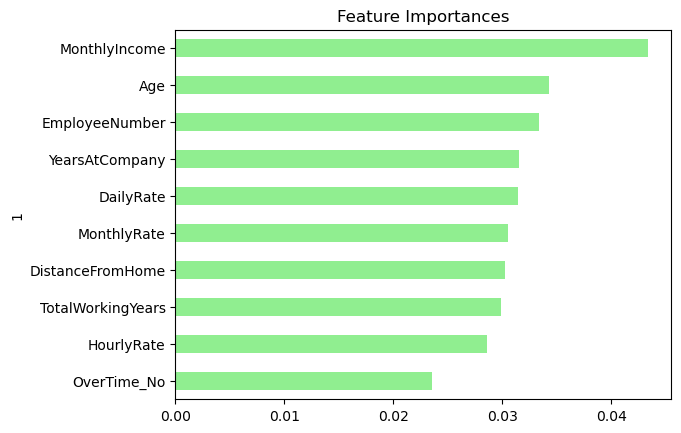

In [25]:
#Plot Importances
importances_df = pd.DataFrame(sorted(zip(rfc.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
top_ten_importances = importances_sorted.tail(10)
top_ten_importances.plot(kind='barh', color='lightgreen', title= 'Feature Importances', legend=False)

# Support Vector Model

In [26]:
#Try Support Vector Model
from sklearn.svm import SVC

In [27]:
#Define model, train and predict
svc = SVC()
svc.fit(X_train_scaled, y_train)
prediction_svc = svc.predict(X_test_scaled)

In [28]:
#Classification report
print(classification_report(y_test, prediction_svc))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90       241
           1       0.00      0.00      0.00        53

    accuracy                           0.82       294
   macro avg       0.41      0.50      0.45       294
weighted avg       0.67      0.82      0.74       294



C:\Users\snbad\anaconda3\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\snbad\anaconda3\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\snbad\anaconda3\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [29]:
#Confusion Matirix
print(confusion_matrix(y_test, prediction_svc))

[[241   0]
 [ 53   0]]


# Logistic Regression Model

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [31]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [32]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

In [33]:
#Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90       241
           1       1.00      0.02      0.04        53

    accuracy                           0.82       294
   macro avg       0.91      0.51      0.47       294
weighted avg       0.85      0.82      0.75       294



In [34]:
#Confusion Matirix
print(confusion_matrix(y_test, y_pred))

[[241   0]
 [ 52   1]]


# Conclusions

Both the Support Vector and Logistic Regression Models had an accuracy of 82%. The Random Forest Model had an accuracy of 83%.